In [2]:
!pip install matplotlib numpy pandas seaborn scikit-learn ipython
!pip install kneed

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.2 MB/s eta 0:00:00


In [3]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

In [4]:
ruta = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [5]:
pd.set_option('display.max_columns', None)
df.head(10)

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,area_,ocupacion_,tip_ss_,cod_ase_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,fecha_contagio,inicio_sintomas,pac_hos_,fec_hos_,condicion_final,fecha_defuncion,fecha_nacimiento,certif_defuncion,familiar_sintomas,fiebre,cefalea,dolor_retroocular,mialgias,artralgia,erupcion,dolor_abdomen,vomito,diarrea,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,1,2411,Contributivo,EPS037,2,2,2,2,1,2,2,2,17/01/2020,10/01/2020,2,NaN,1,NaN,12/11/1994,NaN,2,1,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,1,9997,Contributivo,EPS003,2,2,2,2,2,2,2,2,10/01/2020,7/01/2020,2,NaN,1,NaN,9/02/1995,NaN,2,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,1,9999,Contributivo,EPS013,2,2,2,2,2,2,2,2,12/01/2020,8/01/2020,2,NaN,1,NaN,19/09/1961,NaN,1,1,1,1,1,1,1,2,2,1,2,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,1,4121,Contributivo,EPS013,2,2,2,2,2,2,2,2,10/01/2020,6/01/2020,2,NaN,1,NaN,6/10/1990,NaN,1,1,1,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,1,9210,Especial,37086,2,2,2,2,2,2,2,2,10/01/2020,7/01/2020,1,10/01/2020,1,NaN,12/02/1963,NaN,1,1,1,2,1,2,2,2,1,1,2,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
5,6,25/01/2020,1,2020,45,1,F,170,68,276,1,5121,Contributivo,EPS016,2,2,2,2,2,2,2,2,16/01/2020,8/01/2020,2,NaN,1,NaN,6/04/1974,NaN,2,1,1,2,1,1,2,2,2,1,2,2,2,2,2,2,2,2,1. Ambulatorio,7.073368,-73.088821
6,7,16/01/2020,1,2020,46,1,F,170,68,276,1,7732,Subsidiado,68000,2,2,2,2,2,2,2,2,13/01/2020,11/01/2020,1,13/01/2020,1,NaN,29/09/1973,NaN,2,1,1,2,1,1,1,1,2,1,2,2,2,2,2,2,2,2,2. Hospitalizacion piso,7.080947,-73.089188
7,8,9/01/2020,1,2020,27,1,F,170,68,276,1,2221,Contributivo,EPS005,2,2,2,2,2,2,2,1,9/01/2020,7/01/2020,2,NaN,1,NaN,10/08/1992,NaN,1,1,1,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.084087,-73.085953
8,9,15/01/2020,1,2020,8,2,F,170,68,276,1,9999,Subsidiado,68000,2,2,2,2,2,2,2,2,12/01/2020,11/01/2020,1,12/01/2020,1,NaN,17/04/2019,NaN,2,1,2,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2. Hospitalizacion piso,7.083333,-73.102295
9,10,7/01/2020,1,2020,2,1,M,170,68,276,1,9997,Contributivo,EPS013,2,2,2,2,2,2,2,2,7/01/2020,7/01/2020,2,NaN,1,NaN,7/06/2017,NaN,2,1,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.067431,-73.097923


In [6]:
df.isnull().sum()

ID                      0
fec_not                 0
semana                  0
año                     0
edad_                   0
uni_med_                0
sexo_                   0
cod_pais_o              0
cod_dpto_o              0
cod_mun_o               0
area_                   0
ocupacion_              0
tip_ss_                 0
cod_ase_                9
gp_discapa              0
gp_desplaz              0
gp_migrant              0
gp_carcela              0
gp_gestan               0
gp_calle                0
gp_psiquia              0
gp_vic_vio              0
fecha_contagio          2
inicio_sintomas         2
pac_hos_                0
fec_hos_             1014
condicion_final         0
fecha_defuncion      1262
fecha_nacimiento        0
certif_defuncion     1262
familiar_sintomas       0
fiebre                  0
cefalea                 0
dolor_retroocular       0
mialgias                0
artralgia               0
erupcion                0
dolor_abdomen           0
vomito      

In [7]:
df = df.drop('fec_hos_', axis = 1)
df = df.drop('fecha_defuncion', axis = 1)
df = df.drop('certif_defuncion', axis = 1)
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,area_,ocupacion_,tip_ss_,cod_ase_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,fecha_contagio,inicio_sintomas,pac_hos_,condicion_final,fecha_nacimiento,familiar_sintomas,fiebre,cefalea,dolor_retroocular,mialgias,artralgia,erupcion,dolor_abdomen,vomito,diarrea,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,1,2411,Contributivo,EPS037,2,2,2,2,1,2,2,2,17/01/2020,10/01/2020,2,1,12/11/1994,2,1,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,1,9997,Contributivo,EPS003,2,2,2,2,2,2,2,2,10/01/2020,7/01/2020,2,1,9/02/1995,2,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,1,9999,Contributivo,EPS013,2,2,2,2,2,2,2,2,12/01/2020,8/01/2020,2,1,19/09/1961,1,1,1,1,1,1,1,2,2,1,2,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,1,4121,Contributivo,EPS013,2,2,2,2,2,2,2,2,10/01/2020,6/01/2020,2,1,6/10/1990,1,1,1,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,1,9210,Especial,37086,2,2,2,2,2,2,2,2,10/01/2020,7/01/2020,1,1,12/02/1963,1,1,1,2,1,2,2,2,1,1,2,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,1,9996,Contributivo,EPS013,2,2,2,2,2,2,2,2,6/03/2020,3/03/2020,2,1,3/03/1984,2,1,1,1,1,1,2,2,1,2,2,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,1,2145,Contributivo,EPS017,2,2,2,2,2,2,2,2,13/03/2020,6/03/2020,1,1,3/07/1977,2,1,1,2,1,1,2,2,2,2,2,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,1,9998,Contributivo,EPS013,2,2,2,2,2,2,2,2,8/03/2020,4/03/2020,2,1,3/08/2017,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,1,9997,Contributivo,EPS016,2,2,2,2,2,2,2,2,11/03/2020,5/03/2020,2,1,16/02/2008,2,1,1,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [8]:
df['semana'].unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47,  5,  6,  7,  8,  9, 48, 49, 50, 51])

In [9]:
df['año'].unique()

array([2020])

In [10]:
df = df.drop('año', axis = 1)
df = df.drop('fec_not', axis = 1)
df

,ID,semana,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,area_,ocupacion_,tip_ss_,cod_ase_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,fecha_contagio,inicio_sintomas,pac_hos_,condicion_final,fecha_nacimiento,familiar_sintomas,fiebre,cefalea,dolor_retroocular,mialgias,artralgia,erupcion,dolor_abdomen,vomito,diarrea,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,1,25,1,F,170,68,276,1,2411,Contributivo,EPS037,2,2,2,2,1,2,2,2,17/01/2020,10/01/2020,2,1,12/11/1994,2,1,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,1,24,1,M,170,68,276,1,9997,Contributivo,EPS003,2,2,2,2,2,2,2,2,10/01/2020,7/01/2020,2,1,9/02/1995,2,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,1,58,1,M,170,68,276,1,9999,Contributivo,EPS013,2,2,2,2,2,2,2,2,12/01/2020,8/01/2020,2,1,19/09/1961,1,1,1,1,1,1,1,2,2,1,2,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,1,29,1,F,170,68,276,1,4121,Contributivo,EPS013,2,2,2,2,2,2,2,2,10/01/2020,6/01/2020,2,1,6/10/1990,1,1,1,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,1,56,1,F,170,68,276,1,9210,Especial,37086,2,2,2,2,2,2,2,2,10/01/2020,7/01/2020,1,1,12/02/1963,1,1,1,2,1,2,2,2,1,1,2,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,9,36,1,F,170,68,276,1,9996,Contributivo,EPS013,2,2,2,2,2,2,2,2,6/03/2020,3/03/2020,2,1,3/03/1984,2,1,1,1,1,1,2,2,1,2,2,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,9,42,1,M,170,68,276,1,2145,Contributivo,EPS017,2,2,2,2,2,2,2,2,13/03/2020,6/03/2020,1,1,3/07/1977,2,1,1,2,1,1,2,2,2,2,2,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,9,2,1,M,170,68,276,1,9998,Contributivo,EPS013,2,2,2,2,2,2,2,2,8/03/2020,4/03/2020,2,1,3/08/2017,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,9,12,1,F,170,68,276,1,9997,Contributivo,EPS016,2,2,2,2,2,2,2,2,11/03/2020,5/03/2020,2,1,16/02/2008,2,1,1,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [11]:
df = df.drop('ID', axis = 1)
df

,semana,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,area_,ocupacion_,tip_ss_,cod_ase_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,fecha_contagio,inicio_sintomas,pac_hos_,condicion_final,fecha_nacimiento,familiar_sintomas,fiebre,cefalea,dolor_retroocular,mialgias,artralgia,erupcion,dolor_abdomen,vomito,diarrea,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,25,1,F,170,68,276,1,2411,Contributivo,EPS037,2,2,2,2,1,2,2,2,17/01/2020,10/01/2020,2,1,12/11/1994,2,1,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,1,24,1,M,170,68,276,1,9997,Contributivo,EPS003,2,2,2,2,2,2,2,2,10/01/2020,7/01/2020,2,1,9/02/1995,2,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,1,58,1,M,170,68,276,1,9999,Contributivo,EPS013,2,2,2,2,2,2,2,2,12/01/2020,8/01/2020,2,1,19/09/1961,1,1,1,1,1,1,1,2,2,1,2,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,1,29,1,F,170,68,276,1,4121,Contributivo,EPS013,2,2,2,2,2,2,2,2,10/01/2020,6/01/2020,2,1,6/10/1990,1,1,1,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,1,56,1,F,170,68,276,1,9210,Especial,37086,2,2,2,2,2,2,2,2,10/01/2020,7/01/2020,1,1,12/02/1963,1,1,1,2,1,2,2,2,1,1,2,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,9,36,1,F,170,68,276,1,9996,Contributivo,EPS013,2,2,2,2,2,2,2,2,6/03/2020,3/03/2020,2,1,3/03/1984,2,1,1,1,1,1,2,2,1,2,2,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,9,42,1,M,170,68,276,1,2145,Contributivo,EPS017,2,2,2,2,2,2,2,2,13/03/2020,6/03/2020,1,1,3/07/1977,2,1,1,2,1,1,2,2,2,2,2,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,9,2,1,M,170,68,276,1,9998,Contributivo,EPS013,2,2,2,2,2,2,2,2,8/03/2020,4/03/2020,2,1,3/08/2017,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,9,12,1,F,170,68,276,1,9997,Contributivo,EPS016,2,2,2,2,2,2,2,2,11/03/2020,5/03/2020,2,1,16/02/2008,2,1,1,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [12]:
df.groupby(['uni_med_']).size()

uni_med_
1    1214
2      47
4       1
dtype: int64

In [13]:
df = df[df['uni_med_'] != 4]

In [14]:
df.groupby(['uni_med_']).size()

uni_med_
1    1214
2      47
dtype: int64

In [15]:
df.loc[df['uni_med_'] == 2, 'edad_'] /= 12

In [16]:
registros_uni_med_2 = df[df['uni_med_'] == 2]
registros_uni_med_2

,semana,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,area_,ocupacion_,tip_ss_,cod_ase_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,fecha_contagio,inicio_sintomas,pac_hos_,condicion_final,fecha_nacimiento,familiar_sintomas,fiebre,cefalea,dolor_retroocular,mialgias,artralgia,erupcion,dolor_abdomen,vomito,diarrea,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
8,1,0.666667,2,F,170,68,276,1,9999,Subsidiado,68000,2,2,2,2,2,2,2,2,12/01/2020,11/01/2020,1,1,17/04/2019,2,1,2,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2. Hospitalizacion piso,7.083333,-73.102295
22,10,0.750000,2,M,170,68,276,1,9998,Contributivo,EPS013,2,2,2,2,2,2,2,2,12/03/2020,9/03/2020,2,1,15/06/2019,2,1,2,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.089942,-73.094635
23,10,0.500000,2,F,170,68,276,1,9998,Contributivo,EPS016,2,2,2,2,2,2,2,2,14/03/2020,10/03/2020,2,1,11/09/2019,2,1,2,2,1,2,1,2,2,1,2,2,2,2,2,2,2,2,1. Ambulatorio,7.077584,-73.105316
39,12,0.083333,2,M,170,68,276,1,9998,Contributivo,EPS005,2,2,2,2,2,2,2,2,26/03/2020,25/03/2020,1,1,19/03/2020,2,1,2,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2. Hospitalizacion piso,7.080588,-73.108383
76,17,0.500000,2,M,170,68,276,1,9998,Contributivo,EPS005,2,2,1,2,2,2,2,2,3/05/2020,1/05/2020,1,1,19/10/2019,2,1,2,2,1,2,1,2,2,2,2,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.083954,-73.086952
207,29,0.666667,2,F,170,68,276,1,9999,Subsidiado,68000,2,2,2,2,2,2,2,2,24/07/2020,20/07/2020,1,1,21/11/2019,2,1,2,2,2,1,1,2,2,1,2,2,2,2,2,2,2,2,2. Hospitalizacion piso,7.059835,-73.088341
289,38,0.416667,2,M,170,68,276,1,9998,Contributivo,EPS016,2,2,2,2,2,2,2,2,30/09/2020,25/09/2020,1,1,29/04/2020,2,1,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,4. Observacion,7.088641,-73.089348
300,39,0.750000,2,F,170,68,276,1,9998,Contributivo,EPS016,2,2,2,2,2,2,2,2,1/10/2020,28/09/2020,2,1,3/12/2019,2,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.082202,-73.084152
351,42,0.666667,2,F,170,68,276,1,9998,Contributivo,EPS016,2,2,2,2,2,2,2,2,21/10/2020,19/10/2020,1,1,4/02/2020,2,1,2,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2. Hospitalizacion piso,7.068265,-73.085907
400,7,0.916667,2,M,170,68,276,1,9998,Contributivo,EPS037,2,2,2,2,2,2,2,2,19/02/2020,16/02/2020,1,1,8/03/2019,2,1,2,2,2,1,1,1,2,2,2,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.093173,-73.092079


In [17]:
df = df.drop('uni_med_', axis = 1)
df

,semana,edad_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,area_,ocupacion_,tip_ss_,cod_ase_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,fecha_contagio,inicio_sintomas,pac_hos_,condicion_final,fecha_nacimiento,familiar_sintomas,fiebre,cefalea,dolor_retroocular,mialgias,artralgia,erupcion,dolor_abdomen,vomito,diarrea,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,25.0,F,170,68,276,1,2411,Contributivo,EPS037,2,2,2,2,1,2,2,2,17/01/2020,10/01/2020,2,1,12/11/1994,2,1,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,1,24.0,M,170,68,276,1,9997,Contributivo,EPS003,2,2,2,2,2,2,2,2,10/01/2020,7/01/2020,2,1,9/02/1995,2,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,1,58.0,M,170,68,276,1,9999,Contributivo,EPS013,2,2,2,2,2,2,2,2,12/01/2020,8/01/2020,2,1,19/09/1961,1,1,1,1,1,1,1,2,2,1,2,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,1,29.0,F,170,68,276,1,4121,Contributivo,EPS013,2,2,2,2,2,2,2,2,10/01/2020,6/01/2020,2,1,6/10/1990,1,1,1,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,1,56.0,F,170,68,276,1,9210,Especial,37086,2,2,2,2,2,2,2,2,10/01/2020,7/01/2020,1,1,12/02/1963,1,1,1,2,1,2,2,2,1,1,2,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,9,36.0,F,170,68,276,1,9996,Contributivo,EPS013,2,2,2,2,2,2,2,2,6/03/2020,3/03/2020,2,1,3/03/1984,2,1,1,1,1,1,2,2,1,2,2,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,9,42.0,M,170,68,276,1,2145,Contributivo,EPS017,2,2,2,2,2,2,2,2,13/03/2020,6/03/2020,1,1,3/07/1977,2,1,1,2,1,1,2,2,2,2,2,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,9,2.0,M,170,68,276,1,9998,Contributivo,EPS013,2,2,2,2,2,2,2,2,8/03/2020,4/03/2020,2,1,3/08/2017,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,9,12.0,F,170,68,276,1,9997,Contributivo,EPS016,2,2,2,2,2,2,2,2,11/03/2020,5/03/2020,2,1,16/02/2008,2,1,1,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [18]:
df.groupby(['cod_pais_o']).size()

cod_pais_o
170    1261
dtype: int64

In [19]:
df = df.drop('cod_pais_o', axis = 1)
df

,semana,edad_,sexo_,cod_dpto_o,cod_mun_o,area_,ocupacion_,tip_ss_,cod_ase_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,fecha_contagio,inicio_sintomas,pac_hos_,condicion_final,fecha_nacimiento,familiar_sintomas,fiebre,cefalea,dolor_retroocular,mialgias,artralgia,erupcion,dolor_abdomen,vomito,diarrea,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,25.0,F,68,276,1,2411,Contributivo,EPS037,2,2,2,2,1,2,2,2,17/01/2020,10/01/2020,2,1,12/11/1994,2,1,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,1,24.0,M,68,276,1,9997,Contributivo,EPS003,2,2,2,2,2,2,2,2,10/01/2020,7/01/2020,2,1,9/02/1995,2,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,1,58.0,M,68,276,1,9999,Contributivo,EPS013,2,2,2,2,2,2,2,2,12/01/2020,8/01/2020,2,1,19/09/1961,1,1,1,1,1,1,1,2,2,1,2,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,1,29.0,F,68,276,1,4121,Contributivo,EPS013,2,2,2,2,2,2,2,2,10/01/2020,6/01/2020,2,1,6/10/1990,1,1,1,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,1,56.0,F,68,276,1,9210,Especial,37086,2,2,2,2,2,2,2,2,10/01/2020,7/01/2020,1,1,12/02/1963,1,1,1,2,1,2,2,2,1,1,2,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,9,36.0,F,68,276,1,9996,Contributivo,EPS013,2,2,2,2,2,2,2,2,6/03/2020,3/03/2020,2,1,3/03/1984,2,1,1,1,1,1,2,2,1,2,2,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,9,42.0,M,68,276,1,2145,Contributivo,EPS017,2,2,2,2,2,2,2,2,13/03/2020,6/03/2020,1,1,3/07/1977,2,1,1,2,1,1,2,2,2,2,2,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,9,2.0,M,68,276,1,9998,Contributivo,EPS013,2,2,2,2,2,2,2,2,8/03/2020,4/03/2020,2,1,3/08/2017,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,9,12.0,F,68,276,1,9997,Contributivo,EPS016,2,2,2,2,2,2,2,2,11/03/2020,5/03/2020,2,1,16/02/2008,2,1,1,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [20]:
df.groupby(['cod_dpto_o']).size()

cod_dpto_o
20       2
23       1
41       2
68    1255
91       1
dtype: int64

In [21]:
df = df[df['cod_dpto_o'] == 68]
df.groupby(['cod_dpto_o']).size()

cod_dpto_o
68    1255
dtype: int64

In [22]:
df = df.drop('cod_dpto_o', axis = 1)
df = df.drop('cod_mun_o', axis = 1)
df

,semana,edad_,sexo_,area_,ocupacion_,tip_ss_,cod_ase_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,fecha_contagio,inicio_sintomas,pac_hos_,condicion_final,fecha_nacimiento,familiar_sintomas,fiebre,cefalea,dolor_retroocular,mialgias,artralgia,erupcion,dolor_abdomen,vomito,diarrea,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,25.0,F,1,2411,Contributivo,EPS037,2,2,2,2,1,2,2,2,17/01/2020,10/01/2020,2,1,12/11/1994,2,1,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,1,24.0,M,1,9997,Contributivo,EPS003,2,2,2,2,2,2,2,2,10/01/2020,7/01/2020,2,1,9/02/1995,2,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,1,58.0,M,1,9999,Contributivo,EPS013,2,2,2,2,2,2,2,2,12/01/2020,8/01/2020,2,1,19/09/1961,1,1,1,1,1,1,1,2,2,1,2,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,1,29.0,F,1,4121,Contributivo,EPS013,2,2,2,2,2,2,2,2,10/01/2020,6/01/2020,2,1,6/10/1990,1,1,1,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,1,56.0,F,1,9210,Especial,37086,2,2,2,2,2,2,2,2,10/01/2020,7/01/2020,1,1,12/02/1963,1,1,1,2,1,2,2,2,1,1,2,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,9,36.0,F,1,9996,Contributivo,EPS013,2,2,2,2,2,2,2,2,6/03/2020,3/03/2020,2,1,3/03/1984,2,1,1,1,1,1,2,2,1,2,2,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,9,42.0,M,1,2145,Contributivo,EPS017,2,2,2,2,2,2,2,2,13/03/2020,6/03/2020,1,1,3/07/1977,2,1,1,2,1,1,2,2,2,2,2,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,9,2.0,M,1,9998,Contributivo,EPS013,2,2,2,2,2,2,2,2,8/03/2020,4/03/2020,2,1,3/08/2017,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,9,12.0,F,1,9997,Contributivo,EPS016,2,2,2,2,2,2,2,2,11/03/2020,5/03/2020,2,1,16/02/2008,2,1,1,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [23]:
df.groupby(['sexo_']).size()

sexo_
F    603
M    652
dtype: int64

In [24]:
df["sex_"] = 0
df.sex_.loc[df.sexo_=="F"] = 1
df.sex_.loc[df.sexo_=="M"] = 0
df

<ipython-input-24-1bc4094603c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sex_.loc[df.sexo_=="F"] = 1
<ipython-input-24-1bc4094603c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sex_.loc[df.sexo_=="M"] = 0


,semana,edad_,sexo_,area_,ocupacion_,tip_ss_,cod_ase_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,fecha_contagio,inicio_sintomas,pac_hos_,condicion_final,fecha_nacimiento,familiar_sintomas,fiebre,cefalea,dolor_retroocular,mialgias,artralgia,erupcion,dolor_abdomen,vomito,diarrea,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud,sex_
0,1,25.0,F,1,2411,Contributivo,EPS037,2,2,2,2,1,2,2,2,17/01/2020,10/01/2020,2,1,12/11/1994,2,1,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501,1
1,1,24.0,M,1,9997,Contributivo,EPS003,2,2,2,2,2,2,2,2,10/01/2020,7/01/2020,2,1,9/02/1995,2,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400,0
2,1,58.0,M,1,9999,Contributivo,EPS013,2,2,2,2,2,2,2,2,12/01/2020,8/01/2020,2,1,19/09/1961,1,1,1,1,1,1,1,2,2,1,2,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003,0
3,1,29.0,F,1,4121,Contributivo,EPS013,2,2,2,2,2,2,2,2,10/01/2020,6/01/2020,2,1,6/10/1990,1,1,1,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958,1
4,1,56.0,F,1,9210,Especial,37086,2,2,2,2,2,2,2,2,10/01/2020,7/01/2020,1,1,12/02/1963,1,1,1,2,1,2,2,2,1,1,2,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,9,36.0,F,1,9996,Contributivo,EPS013,2,2,2,2,2,2,2,2,6/03/2020,3/03/2020,2,1,3/03/1984,2,1,1,1,1,1,2,2,1,2,2,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487,1
1258,9,42.0,M,1,2145,Contributivo,EPS017,2,2,2,2,2,2,2,2,13/03/2020,6/03/2020,1,1,3/07/1977,2,1,1,2,1,1,2,2,2,2,2,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607,0
1259,9,2.0,M,1,9998,Contributivo,EPS013,2,2,2,2,2,2,2,2,8/03/2020,4/03/2020,2,1,3/08/2017,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264,0
1260,9,12.0,F,1,9997,Contributivo,EPS016,2,2,2,2,2,2,2,2,11/03/2020,5/03/2020,2,1,16/02/2008,2,1,1,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000,1


In [25]:
df.groupby(['area_']).size()

area_
1    1234
2      20
3       1
dtype: int64

In [26]:
df["area_cabecera"] = 0
df.area_cabecera.loc[df.area_==1] = 1
df.area_cabecera.loc[df.area_!=1] = 0

df["area_poblado"] = 0
df.area_poblado.loc[df.area_==2] = 1
df.area_poblado.loc[df.area_!=2] = 0

df["area_rural"] = 0
df.area_rural.loc[df.area_==3] = 1
df.area_rural.loc[df.area_!=3] = 0

df = df.drop('area_', axis = 1)
df

<ipython-input-26-7d9e0957220c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.area_cabecera.loc[df.area_==1] = 1
<ipython-input-26-7d9e0957220c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.area_cabecera.loc[df.area_!=1] = 0
<ipython-input-26-7d9e0957220c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.area_poblado.loc[df.area_==2] = 1
<ipython-input-26-7d9e0957220c>:7: SettingWithCopyWarning: 
A value is trying to be

,semana,edad_,sexo_,ocupacion_,tip_ss_,cod_ase_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,fecha_contagio,inicio_sintomas,pac_hos_,condicion_final,fecha_nacimiento,familiar_sintomas,fiebre,cefalea,dolor_retroocular,mialgias,artralgia,erupcion,dolor_abdomen,vomito,diarrea,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud,sex_,area_cabecera,area_poblado,area_rural
0,1,25.0,F,2411,Contributivo,EPS037,2,2,2,2,1,2,2,2,17/01/2020,10/01/2020,2,1,12/11/1994,2,1,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501,1,1,0,0
1,1,24.0,M,9997,Contributivo,EPS003,2,2,2,2,2,2,2,2,10/01/2020,7/01/2020,2,1,9/02/1995,2,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400,0,1,0,0
2,1,58.0,M,9999,Contributivo,EPS013,2,2,2,2,2,2,2,2,12/01/2020,8/01/2020,2,1,19/09/1961,1,1,1,1,1,1,1,2,2,1,2,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003,0,1,0,0
3,1,29.0,F,4121,Contributivo,EPS013,2,2,2,2,2,2,2,2,10/01/2020,6/01/2020,2,1,6/10/1990,1,1,1,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958,1,1,0,0
4,1,56.0,F,9210,Especial,37086,2,2,2,2,2,2,2,2,10/01/2020,7/01/2020,1,1,12/02/1963,1,1,1,2,1,2,2,2,1,1,2,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,9,36.0,F,9996,Contributivo,EPS013,2,2,2,2,2,2,2,2,6/03/2020,3/03/2020,2,1,3/03/1984,2,1,1,1,1,1,2,2,1,2,2,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487,1,1,0,0
1258,9,42.0,M,2145,Contributivo,EPS017,2,2,2,2,2,2,2,2,13/03/2020,6/03/2020,1,1,3/07/1977,2,1,1,2,1,1,2,2,2,2,2,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607,0,1,0,0
1259,9,2.0,M,9998,Contributivo,EPS013,2,2,2,2,2,2,2,2,8/03/2020,4/03/2020,2,1,3/08/2017,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264,0,1,0,0
1260,9,12.0,F,9997,Contributivo,EPS016,2,2,2,2,2,2,2,2,11/03/2020,5/03/2020,2,1,16/02/2008,2,1,1,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000,1,1,0,0


In [27]:
df = df.drop('ocupacion_', axis = 1)
df

,semana,edad_,sexo_,tip_ss_,cod_ase_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,fecha_contagio,inicio_sintomas,pac_hos_,condicion_final,fecha_nacimiento,familiar_sintomas,fiebre,cefalea,dolor_retroocular,mialgias,artralgia,erupcion,dolor_abdomen,vomito,diarrea,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud,sex_,area_cabecera,area_poblado,area_rural
0,1,25.0,F,Contributivo,EPS037,2,2,2,2,1,2,2,2,17/01/2020,10/01/2020,2,1,12/11/1994,2,1,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501,1,1,0,0
1,1,24.0,M,Contributivo,EPS003,2,2,2,2,2,2,2,2,10/01/2020,7/01/2020,2,1,9/02/1995,2,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400,0,1,0,0
2,1,58.0,M,Contributivo,EPS013,2,2,2,2,2,2,2,2,12/01/2020,8/01/2020,2,1,19/09/1961,1,1,1,1,1,1,1,2,2,1,2,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003,0,1,0,0
3,1,29.0,F,Contributivo,EPS013,2,2,2,2,2,2,2,2,10/01/2020,6/01/2020,2,1,6/10/1990,1,1,1,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958,1,1,0,0
4,1,56.0,F,Especial,37086,2,2,2,2,2,2,2,2,10/01/2020,7/01/2020,1,1,12/02/1963,1,1,1,2,1,2,2,2,1,1,2,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,9,36.0,F,Contributivo,EPS013,2,2,2,2,2,2,2,2,6/03/2020,3/03/2020,2,1,3/03/1984,2,1,1,1,1,1,2,2,1,2,2,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487,1,1,0,0
1258,9,42.0,M,Contributivo,EPS017,2,2,2,2,2,2,2,2,13/03/2020,6/03/2020,1,1,3/07/1977,2,1,1,2,1,1,2,2,2,2,2,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607,0,1,0,0
1259,9,2.0,M,Contributivo,EPS013,2,2,2,2,2,2,2,2,8/03/2020,4/03/2020,2,1,3/08/2017,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264,0,1,0,0
1260,9,12.0,F,Contributivo,EPS016,2,2,2,2,2,2,2,2,11/03/2020,5/03/2020,2,1,16/02/2008,2,1,1,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000,1,1,0,0


In [28]:
df = df.drop('cod_ase_', axis = 1)
df = df.drop('sexo_', axis = 1)
df

,semana,edad_,tip_ss_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,fecha_contagio,inicio_sintomas,pac_hos_,condicion_final,fecha_nacimiento,familiar_sintomas,fiebre,cefalea,dolor_retroocular,mialgias,artralgia,erupcion,dolor_abdomen,vomito,diarrea,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud,sex_,area_cabecera,area_poblado,area_rural
0,1,25.0,Contributivo,2,2,2,2,1,2,2,2,17/01/2020,10/01/2020,2,1,12/11/1994,2,1,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501,1,1,0,0
1,1,24.0,Contributivo,2,2,2,2,2,2,2,2,10/01/2020,7/01/2020,2,1,9/02/1995,2,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400,0,1,0,0
2,1,58.0,Contributivo,2,2,2,2,2,2,2,2,12/01/2020,8/01/2020,2,1,19/09/1961,1,1,1,1,1,1,1,2,2,1,2,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003,0,1,0,0
3,1,29.0,Contributivo,2,2,2,2,2,2,2,2,10/01/2020,6/01/2020,2,1,6/10/1990,1,1,1,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958,1,1,0,0
4,1,56.0,Especial,2,2,2,2,2,2,2,2,10/01/2020,7/01/2020,1,1,12/02/1963,1,1,1,2,1,2,2,2,1,1,2,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,9,36.0,Contributivo,2,2,2,2,2,2,2,2,6/03/2020,3/03/2020,2,1,3/03/1984,2,1,1,1,1,1,2,2,1,2,2,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487,1,1,0,0
1258,9,42.0,Contributivo,2,2,2,2,2,2,2,2,13/03/2020,6/03/2020,1,1,3/07/1977,2,1,1,2,1,1,2,2,2,2,2,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607,0,1,0,0
1259,9,2.0,Contributivo,2,2,2,2,2,2,2,2,8/03/2020,4/03/2020,2,1,3/08/2017,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264,0,1,0,0
1260,9,12.0,Contributivo,2,2,2,2,2,2,2,2,11/03/2020,5/03/2020,2,1,16/02/2008,2,1,1,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000,1,1,0,0


In [29]:
df.groupby(['gp_discapa']).size()

gp_discapa
1       8
2    1247
dtype: int64

In [30]:
df.gp_discapa.loc[df.gp_discapa==2] = 0
df.gp_desplaz.loc[df.gp_desplaz==2] = 0
df.gp_migrant.loc[df.gp_migrant==2] = 0
df.gp_carcela.loc[df.gp_carcela==2] = 0
df.gp_gestan.loc[df.gp_gestan==2] = 0
df.gp_calle.loc[df.gp_calle==2] = 0
df.gp_psiquia.loc[df.gp_psiquia==2] = 0
df.gp_vic_vio.loc[df.gp_vic_vio==2] = 0

df.pac_hos_.loc[df.pac_hos_==2] = 0
df.familiar_sintomas.loc[df.familiar_sintomas==2] = 0
df

<ipython-input-30-9a8df0bd38a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.gp_discapa.loc[df.gp_discapa==2] = 0
<ipython-input-30-9a8df0bd38a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.gp_desplaz.loc[df.gp_desplaz==2] = 0
<ipython-input-30-9a8df0bd38a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.gp_migrant.loc[df.gp_migrant==2] = 0
<ipython-input-30-9a8df0bd38a3>:4: SettingWithCopyWarning: 
A value is tryin

,semana,edad_,tip_ss_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,fecha_contagio,inicio_sintomas,pac_hos_,condicion_final,fecha_nacimiento,familiar_sintomas,fiebre,cefalea,dolor_retroocular,mialgias,artralgia,erupcion,dolor_abdomen,vomito,diarrea,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud,sex_,area_cabecera,area_poblado,area_rural
0,1,25.0,Contributivo,0,0,0,0,1,0,0,0,17/01/2020,10/01/2020,0,1,12/11/1994,0,1,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501,1,1,0,0
1,1,24.0,Contributivo,0,0,0,0,0,0,0,0,10/01/2020,7/01/2020,0,1,9/02/1995,0,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400,0,1,0,0
2,1,58.0,Contributivo,0,0,0,0,0,0,0,0,12/01/2020,8/01/2020,0,1,19/09/1961,1,1,1,1,1,1,1,2,2,1,2,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003,0,1,0,0
3,1,29.0,Contributivo,0,0,0,0,0,0,0,0,10/01/2020,6/01/2020,0,1,6/10/1990,1,1,1,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958,1,1,0,0
4,1,56.0,Especial,0,0,0,0,0,0,0,0,10/01/2020,7/01/2020,1,1,12/02/1963,1,1,1,2,1,2,2,2,1,1,2,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,9,36.0,Contributivo,0,0,0,0,0,0,0,0,6/03/2020,3/03/2020,0,1,3/03/1984,0,1,1,1,1,1,2,2,1,2,2,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487,1,1,0,0
1258,9,42.0,Contributivo,0,0,0,0,0,0,0,0,13/03/2020,6/03/2020,1,1,3/07/1977,0,1,1,2,1,1,2,2,2,2,2,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607,0,1,0,0
1259,9,2.0,Contributivo,0,0,0,0,0,0,0,0,8/03/2020,4/03/2020,0,1,3/08/2017,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264,0,1,0,0
1260,9,12.0,Contributivo,0,0,0,0,0,0,0,0,11/03/2020,5/03/2020,0,1,16/02/2008,0,1,1,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000,1,1,0,0


In [31]:
df.groupby(['tip_ss_']).size()

tip_ss_
Contributivo    934
Especial         53
No asegurado      9
Particular       23
Subsidiado      236
dtype: int64

In [32]:
df["Contributivo"] = 0
df.Contributivo.loc[df.tip_ss_=="Contributivo"] = 1
df.Contributivo.loc[df.tip_ss_!="Contributivo"] = 0

df["Especial"] = 0
df.Especial.loc[df.tip_ss_=="Especial"] = 1
df.Especial.loc[df.tip_ss_!="Especial"] = 0

df["Particular"] = 0
df.Particular.loc[df.tip_ss_=="Particular"] = 1
df.Particular.loc[df.tip_ss_!="Particular"] = 0

df["Subsidiado"] = 0
df.Subsidiado.loc[df.tip_ss_=="Subsidiado"] = 1
df.Subsidiado.loc[df.tip_ss_!="Subsidiado"] = 0

df = df.drop('tip_ss_', axis = 1)
df

<ipython-input-32-a82d0601d60c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Contributivo.loc[df.tip_ss_=="Contributivo"] = 1
<ipython-input-32-a82d0601d60c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Contributivo.loc[df.tip_ss_!="Contributivo"] = 0
<ipython-input-32-a82d0601d60c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Especial.loc[df.tip_ss_=="Especial"] = 1
<ipython-input-32-a82d0601d60c>:7: SettingWithCo

,semana,edad_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,fecha_contagio,inicio_sintomas,pac_hos_,condicion_final,fecha_nacimiento,familiar_sintomas,fiebre,cefalea,dolor_retroocular,mialgias,artralgia,erupcion,dolor_abdomen,vomito,diarrea,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud,sex_,area_cabecera,area_poblado,area_rural,Contributivo,Especial,Particular,Subsidiado
0,1,25.0,0,0,0,0,1,0,0,0,17/01/2020,10/01/2020,0,1,12/11/1994,0,1,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501,1,1,0,0,1,0,0,0
1,1,24.0,0,0,0,0,0,0,0,0,10/01/2020,7/01/2020,0,1,9/02/1995,0,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400,0,1,0,0,1,0,0,0
2,1,58.0,0,0,0,0,0,0,0,0,12/01/2020,8/01/2020,0,1,19/09/1961,1,1,1,1,1,1,1,2,2,1,2,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003,0,1,0,0,1,0,0,0
3,1,29.0,0,0,0,0,0,0,0,0,10/01/2020,6/01/2020,0,1,6/10/1990,1,1,1,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958,1,1,0,0,1,0,0,0
4,1,56.0,0,0,0,0,0,0,0,0,10/01/2020,7/01/2020,1,1,12/02/1963,1,1,1,2,1,2,2,2,1,1,2,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,9,36.0,0,0,0,0,0,0,0,0,6/03/2020,3/03/2020,0,1,3/03/1984,0,1,1,1,1,1,2,2,1,2,2,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487,1,1,0,0,1,0,0,0
1258,9,42.0,0,0,0,0,0,0,0,0,13/03/2020,6/03/2020,1,1,3/07/1977,0,1,1,2,1,1,2,2,2,2,2,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607,0,1,0,0,1,0,0,0
1259,9,2.0,0,0,0,0,0,0,0,0,8/03/2020,4/03/2020,0,1,3/08/2017,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264,0,1,0,0,1,0,0,0
1260,9,12.0,0,0,0,0,0,0,0,0,11/03/2020,5/03/2020,0,1,16/02/2008,0,1,1,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000,1,1,0,0,1,0,0,0


In [33]:
df = df.drop('fecha_contagio', axis = 1)
df = df.drop('inicio_sintomas', axis = 1)
df = df.drop('fecha_nacimiento', axis = 1)
df

,semana,edad_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,pac_hos_,condicion_final,familiar_sintomas,fiebre,cefalea,dolor_retroocular,mialgias,artralgia,erupcion,dolor_abdomen,vomito,diarrea,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud,sex_,area_cabecera,area_poblado,area_rural,Contributivo,Especial,Particular,Subsidiado
0,1,25.0,0,0,0,0,1,0,0,0,0,1,0,1,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501,1,1,0,0,1,0,0,0
1,1,24.0,0,0,0,0,0,0,0,0,0,1,0,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400,0,1,0,0,1,0,0,0
2,1,58.0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,1,2,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003,0,1,0,0,1,0,0,0
3,1,29.0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958,1,1,0,0,1,0,0,0
4,1,56.0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,1,2,2,2,1,1,2,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,9,36.0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,2,2,1,2,2,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487,1,1,0,0,1,0,0,0
1258,9,42.0,0,0,0,0,0,0,0,0,1,1,0,1,1,2,1,1,2,2,2,2,2,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607,0,1,0,0,1,0,0,0
1259,9,2.0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264,0,1,0,0,1,0,0,0
1260,9,12.0,0,0,0,0,0,0,0,0,0,1,0,1,1,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000,1,1,0,0,1,0,0,0


In [34]:
df = df.drop('fiebre', axis = 1)
df = df.drop('cefalea', axis = 1)
df = df.drop('dolor_retroocular', axis = 1)
df = df.drop('mialgias', axis = 1)
df = df.drop('artralgia', axis = 1)
df = df.drop('erupcion', axis = 1)
df = df.drop('dolor_abdomen', axis = 1)
df = df.drop('vomito', axis = 1)
df = df.drop('diarrea', axis = 1)
df = df.drop('somnolencia', axis = 1)
df = df.drop('hipotension', axis = 1)
df = df.drop('hepatomegalia', axis = 1)
df = df.drop('hemorragia_mucosa', axis = 1)
df = df.drop('hipotermia', axis = 1)
df = df.drop('caida_plaquetas', axis = 1)
df = df.drop('acum_liquido', axis = 1)
df = df.drop('aum_hematocrito', axis = 1)
df

,semana,edad_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,pac_hos_,condicion_final,familiar_sintomas,conducta,latitud,longitud,sex_,area_cabecera,area_poblado,area_rural,Contributivo,Especial,Particular,Subsidiado
0,1,25.0,0,0,0,0,1,0,0,0,0,1,0,1. Ambulatorio,7.076011,-73.102501,1,1,0,0,1,0,0,0
1,1,24.0,0,0,0,0,0,0,0,0,0,1,0,1. Ambulatorio,7.079495,-73.105400,0,1,0,0,1,0,0,0
2,1,58.0,0,0,0,0,0,0,0,0,0,1,1,1. Ambulatorio,7.090290,-73.091003,0,1,0,0,1,0,0,0
3,1,29.0,0,0,0,0,0,0,0,0,0,1,1,1. Ambulatorio,7.067435,-73.090958,1,1,0,0,1,0,0,0
4,1,56.0,0,0,0,0,0,0,0,0,1,1,1,2. Hospitalizacion piso,7.066905,-73.104980,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,9,36.0,0,0,0,0,0,0,0,0,0,1,0,1. Ambulatorio,7.072610,-73.099487,1,1,0,0,1,0,0,0
1258,9,42.0,0,0,0,0,0,0,0,0,1,1,0,2. Hospitalizacion piso,7.065252,-73.103607,0,1,0,0,1,0,0,0
1259,9,2.0,0,0,0,0,0,0,0,0,0,1,1,1. Ambulatorio,7.091391,-73.103264,0,1,0,0,1,0,0,0
1260,9,12.0,0,0,0,0,0,0,0,0,0,1,0,1. Ambulatorio,7.061083,-73.097000,1,1,0,0,1,0,0,0


In [35]:
df.groupby(['condicion_final']).size()

condicion_final
1    1255
dtype: int64

In [36]:
df = df.drop('condicion_final', axis = 1)
df = df.drop('latitud', axis = 1)
df = df.drop('longitud', axis = 1)
df

,semana,edad_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,pac_hos_,familiar_sintomas,conducta,sex_,area_cabecera,area_poblado,area_rural,Contributivo,Especial,Particular,Subsidiado
0,1,25.0,0,0,0,0,1,0,0,0,0,0,1. Ambulatorio,1,1,0,0,1,0,0,0
1,1,24.0,0,0,0,0,0,0,0,0,0,0,1. Ambulatorio,0,1,0,0,1,0,0,0
2,1,58.0,0,0,0,0,0,0,0,0,0,1,1. Ambulatorio,0,1,0,0,1,0,0,0
3,1,29.0,0,0,0,0,0,0,0,0,0,1,1. Ambulatorio,1,1,0,0,1,0,0,0
4,1,56.0,0,0,0,0,0,0,0,0,1,1,2. Hospitalizacion piso,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,9,36.0,0,0,0,0,0,0,0,0,0,0,1. Ambulatorio,1,1,0,0,1,0,0,0
1258,9,42.0,0,0,0,0,0,0,0,0,1,0,2. Hospitalizacion piso,0,1,0,0,1,0,0,0
1259,9,2.0,0,0,0,0,0,0,0,0,0,1,1. Ambulatorio,0,1,0,0,1,0,0,0
1260,9,12.0,0,0,0,0,0,0,0,0,0,0,1. Ambulatorio,1,1,0,0,1,0,0,0


In [37]:
import numpy as np
from scipy.stats import pearsonr, zscore

df = df[(np.abs(zscore(df['edad_']))<=4)]
df

,semana,edad_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,pac_hos_,familiar_sintomas,conducta,sex_,area_cabecera,area_poblado,area_rural,Contributivo,Especial,Particular,Subsidiado
0,1,25.0,0,0,0,0,1,0,0,0,0,0,1. Ambulatorio,1,1,0,0,1,0,0,0
1,1,24.0,0,0,0,0,0,0,0,0,0,0,1. Ambulatorio,0,1,0,0,1,0,0,0
2,1,58.0,0,0,0,0,0,0,0,0,0,1,1. Ambulatorio,0,1,0,0,1,0,0,0
3,1,29.0,0,0,0,0,0,0,0,0,0,1,1. Ambulatorio,1,1,0,0,1,0,0,0
4,1,56.0,0,0,0,0,0,0,0,0,1,1,2. Hospitalizacion piso,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,9,36.0,0,0,0,0,0,0,0,0,0,0,1. Ambulatorio,1,1,0,0,1,0,0,0
1258,9,42.0,0,0,0,0,0,0,0,0,1,0,2. Hospitalizacion piso,0,1,0,0,1,0,0,0
1259,9,2.0,0,0,0,0,0,0,0,0,0,1,1. Ambulatorio,0,1,0,0,1,0,0,0
1260,9,12.0,0,0,0,0,0,0,0,0,0,0,1. Ambulatorio,1,1,0,0,1,0,0,0


In [38]:
df.groupby(['conducta']).size()

conducta
1. Ambulatorio             926
2. Hospitalizacion piso    235
3. UCI                       3
4. Observacion              91
dtype: int64

In [39]:
df["Ambulatorio"] = 0
df.Ambulatorio.loc[df.conducta=="1. Ambulatorio"] = 1
df.Ambulatorio.loc[df.conducta!="1. Ambulatorio"] = 0

df["Hospitalizacion_piso"] = 0
df.Hospitalizacion_piso.loc[df.conducta=="2. Hospitalizacion piso"] = 1
df.Hospitalizacion_piso.loc[df.conducta!="2. Hospitalizacion piso"] = 0

df["UCI"] = 0
df.UCI.loc[df.conducta=="3. UCI"] = 1
df.UCI.loc[df.conducta!="3. UCI"] = 0

df["Observacion"] = 0
df.Observacion.loc[df.conducta=="4. Observacion"] = 1
df.Observacion.loc[df.conducta!="4. Observacion"] = 0

df = df.drop('conducta', axis = 1)
df

<ipython-input-39-3e8ac56f0b9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Ambulatorio.loc[df.conducta=="1. Ambulatorio"] = 1
<ipython-input-39-3e8ac56f0b9c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Ambulatorio.loc[df.conducta!="1. Ambulatorio"] = 0
<ipython-input-39-3e8ac56f0b9c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Hospitalizacion_piso.loc[df.conducta=="2. Hospitalizacion piso"] = 1
<ipython-input-3

,semana,edad_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,pac_hos_,familiar_sintomas,sex_,area_cabecera,area_poblado,area_rural,Contributivo,Especial,Particular,Subsidiado,Ambulatorio,Hospitalizacion_piso,UCI,Observacion
0,1,25.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0
1,1,24.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
2,1,58.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0
3,1,29.0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0
4,1,56.0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,9,36.0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0
1258,9,42.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0
1259,9,2.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0
1260,9,12.0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0


In [40]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
scaled_features

array([[-1.75795909, -0.24965087, -0.08009617, ..., -0.47999183,
        -0.04895065, -0.27960453],
       [-1.75795909, -0.2977996 , -0.08009617, ..., -0.47999183,
        -0.04895065, -0.27960453],
       [-1.75795909,  1.33925736, -0.08009617, ..., -0.47999183,
        -0.04895065, -0.27960453],
       ...,
       [-1.1702948 , -1.35707175, -0.08009617, ..., -0.47999183,
        -0.04895065, -0.27960453],
       [-1.1702948 , -0.87558441, -0.08009617, ..., -0.47999183,
        -0.04895065, -0.27960453],
       [-1.1702948 , -0.77928694, -0.08009617, ...,  2.08336879,
        -0.04895065, -0.27960453]])

In [41]:
kmeans_kwargs = {
  "init": "random",
  "n_init": 10,
  "max_iter": 300,
  "random_state": 42,
}

sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

sse

[28865.000000000022,
 25339.02228396681,
 22018.790469687443,
 20483.593060067324,
 19070.7080808151,
 18056.80028483518,
 17582.389106059156,
 15852.140691262324,
 14928.230373608454,
 14069.014424546176]

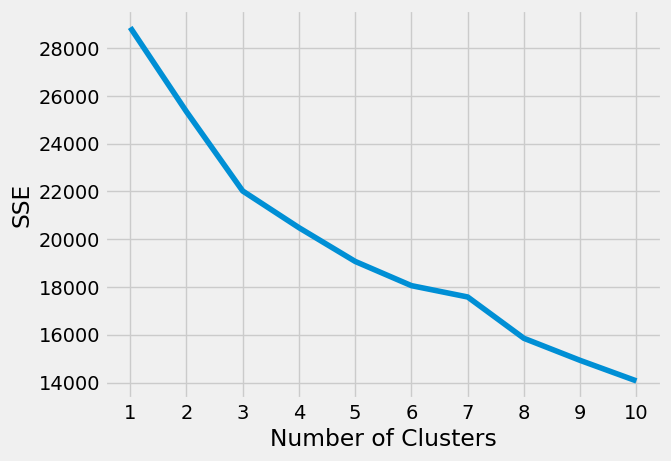

In [42]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [43]:
kl = KneeLocator(
  range(1, 11), sse, curve="convex", direction="decreasing"
)
kl.elbow

3

In [44]:
silhouette_coefficients = []

#Aquí se inicia con 2 cluester
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  score = silhouette_score(scaled_features, kmeans.labels_)
  silhouette_coefficients.append(score)

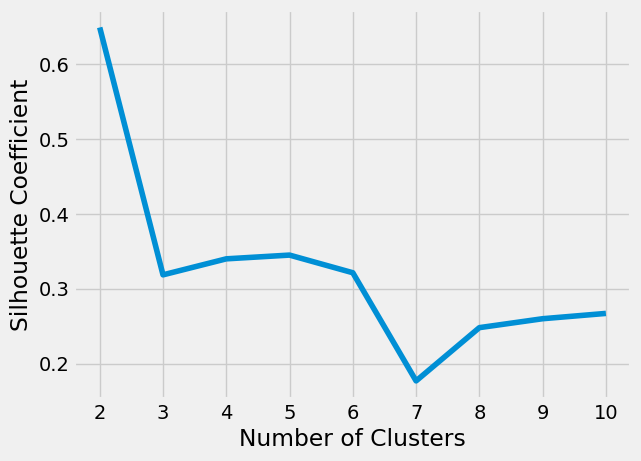

In [45]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()